Importing the data

In [ ]:
!wget 46.101.230.157/testtask/dilans_data.csv

--2021-05-07 12:12:39--  http://46.101.230.157/testtask/dilans_data.csv
Connecting to 46.101.230.157:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34060918 (32M) [application/octet-stream]
Saving to: ‘dilans_data.csv’

dilans_data.csv     100%[===================>]  32.48M  11.6MB/s    in 2.8s    

2021-05-07 12:12:42 (11.6 MB/s) - ‘dilans_data.csv’ saved [34060918/34060918]



Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Separating the dataframe into Columns

In [ ]:
pd.read_csv('dilans_data.csv' , delimiter= ';')

,2018-01-01 00:01:01,read,country_7,2458151261,SEO,North America
0,2018-01-01 00:03:20,read,country_7,2.458151e+09,SEO,South America
1,2018-01-01 00:04:01,read,country_7,2.458151e+09,AdWords,Africa
2,2018-01-01 00:04:02,read,country_7,2.458151e+09,AdWords,Europe
3,2018-01-01 00:05:03,read,country_8,2.458151e+09,Reddit,North America
4,2018-01-01 00:05:42,read,country_6,2.458151e+09,Reddit,North America
...,...,...,...,...,...,...
597896,2018-03-31 04:34:32,read,country_4,2.458361e+09,Africa,NaN
597897,2018-03-31 05:02:06,read,country_6,2.458361e+09,Asia,NaN
597898,2018-03-31 05:02:14,read,country_7,2.458361e+09,North America,NaN
597899,2018-03-31 05:03:53,read,country_7,2.458361e+09,Europe,NaN


Naming the Columns

In [ ]:
pd.read_csv('dilans_data.csv' , delimiter= ';', names = ['datetime','event_type','country','user_id','source','topic'])

,datetime,event_type,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2.458151e+09,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2.458151e+09,SEO,South America
2,2018-01-01 00:04:01,read,country_7,2.458151e+09,AdWords,Africa
3,2018-01-01 00:04:02,read,country_7,2.458151e+09,AdWords,Europe
4,2018-01-01 00:05:03,read,country_8,2.458151e+09,Reddit,North America
...,...,...,...,...,...,...
597897,2018-03-31 04:34:32,read,country_4,2.458361e+09,Africa,NaN
597898,2018-03-31 05:02:06,read,country_6,2.458361e+09,Asia,NaN
597899,2018-03-31 05:02:14,read,country_7,2.458361e+09,North America,NaN
597900,2018-03-31 05:03:53,read,country_7,2.458361e+09,Europe,NaN


In [ ]:
dilans = pd.read_csv('dilans_data.csv' , delimiter= ';', names = ['datetime','event_type','country','user_id','source','topic'])

Filtering all the Readers

In [ ]:
dilans[dilans.event_type == 'read']

,datetime,event_type,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2.458151e+09,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2.458151e+09,SEO,South America
2,2018-01-01 00:04:01,read,country_7,2.458151e+09,AdWords,Africa
3,2018-01-01 00:04:02,read,country_7,2.458151e+09,AdWords,Europe
4,2018-01-01 00:05:03,read,country_8,2.458151e+09,Reddit,North America
...,...,...,...,...,...,...
597897,2018-03-31 04:34:32,read,country_4,2.458361e+09,Africa,NaN
597898,2018-03-31 05:02:06,read,country_6,2.458361e+09,Asia,NaN
597899,2018-03-31 05:02:14,read,country_7,2.458361e+09,North America,NaN
597900,2018-03-31 05:03:53,read,country_7,2.458361e+09,Europe,NaN


In [ ]:
readers = dilans[dilans.event_type == 'read']

In [ ]:
readers.groupby('country')

All Readers by Country

In [ ]:
readers.groupby('country').count()

,datetime,event_type,user_id,source,topic
country,,,,,
country_1,6231,6231,6231,6231,5076
country_2,130076,130076,130076,130076,50675
country_3,9128,9128,9128,9128,2742
country_4,71258,71258,71258,71258,12751
country_5,149732,149732,149732,149732,40349
country_6,63752,63752,63752,63752,31156
country_7,132067,132067,132067,132067,51791
country_8,19633,19633,19633,19633,15483


In [ ]:
countries = readers.groupby('country').count()

In [ ]:
countries.drop(columns = ['source','topic','datetime','event_type'])

,user_id
country,
country_1,6231
country_2,130076
country_3,9128
country_4,71258
country_5,149732
country_6,63752
country_7,132067
country_8,19633


In [ ]:
countries_graph = countries.drop(columns = ['source','topic','datetime','event_type'])

Graphical Representation of all the users by Country

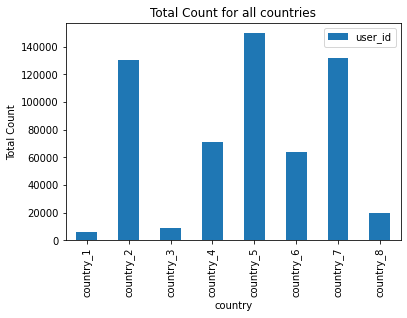

In [ ]:
countries_graph.plot.bar()
plt.ylabel('Total Count')
plt.title('Total Count for all countries')
plt.show()

Filtering First time Readers

In [ ]:
readers.dropna()

,datetime,event_type,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2.458151e+09,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2.458151e+09,SEO,South America
2,2018-01-01 00:04:01,read,country_7,2.458151e+09,AdWords,Africa
3,2018-01-01 00:04:02,read,country_7,2.458151e+09,AdWords,Europe
4,2018-01-01 00:05:03,read,country_8,2.458151e+09,Reddit,North America
...,...,...,...,...,...,...
597756,2018-03-30 23:57:06,read,country_1,2.458361e+09,SEO,North America
597760,2018-03-30 23:58:54,read,country_6,2.458361e+09,AdWords,Asia
597763,2018-03-30 23:59:13,read,country_8,2.458361e+09,AdWords,Europe
597767,2018-03-30 23:59:40,read,country_5,2.458361e+09,AdWords,Europe


In [ ]:
first_readers = readers.dropna()

In [ ]:
first_readers.groupby('country').count()

,datetime,event_type,user_id,source,topic
country,,,,,
country_1,5076,5076,5076,5076,5076
country_2,50675,50675,50675,50675,50675
country_3,2742,2742,2742,2742,2742
country_4,12751,12751,12751,12751,12751
country_5,40349,40349,40349,40349,40349
country_6,31156,31156,31156,31156,31156
country_7,51791,51791,51791,51791,51791
country_8,15483,15483,15483,15483,15483


In [ ]:
firstreaders = first_readers.groupby('country').count()

In [ ]:
firstreaders.drop(columns = ['source','topic','datetime','event_type'])

,user_id
country,
country_1,5076
country_2,50675
country_3,2742
country_4,12751
country_5,40349
country_6,31156
country_7,51791
country_8,15483


In [ ]:
freaders = firstreaders.drop(columns = ['source','topic','datetime','event_type'])

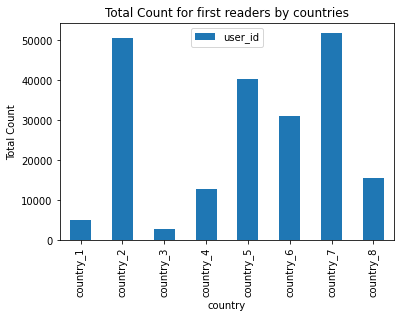

In [ ]:
freaders.plot.bar()
plt.ylabel('Total Count')
plt.title('Total Count for first readers by countries')
plt.show()

Filtering First-time Readers by Source

In [ ]:
first_readers.groupby('source').count()

,datetime,event_type,country,user_id,topic
source,,,,,
AdWords,63065,63065,63065,63065,63065
Reddit,105216,105216,105216,105216,105216
SEO,41742,41742,41742,41742,41742


In [ ]:
source = first_readers.groupby('source').count()

In [ ]:
source.drop(columns = ['datetime','topic','country','event_type'])

,user_id
source,
AdWords,63065
Reddit,105216
SEO,41742


In [ ]:
source1 = source.drop(columns = ['datetime','topic','country','event_type'])

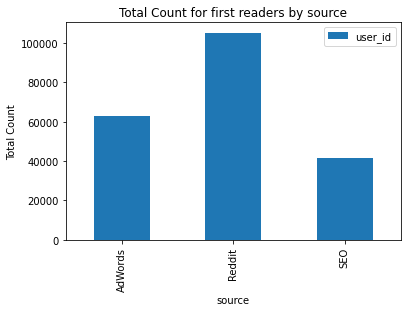

In [ ]:
source1.plot.bar()
plt.ylabel('Total Count')
plt.title('Total Count for first readers by source')
plt.show()

Filtering first-time Readers by Topic

In [ ]:
first_readers.groupby('topic').count()

,datetime,event_type,country,user_id,source
topic,,,,,
Africa,15913,15913,15913,15913,15913
Asia,76092,76092,76092,76092,76092
Australia,15795,15795,15795,15795,15795
Europe,39561,39561,39561,39561,39561
North America,37567,37567,37567,37567,37567
South America,25095,25095,25095,25095,25095


In [ ]:

topic = first_readers.groupby('topic').count()

In [ ]:
topic.drop(columns = ['datetime','source','country','event_type'])

,user_id
topic,
Africa,15913
Asia,76092
Australia,15795
Europe,39561
North America,37567
South America,25095


In [ ]:
topic1 = topic.drop(columns = ['datetime','source','country','event_type'])

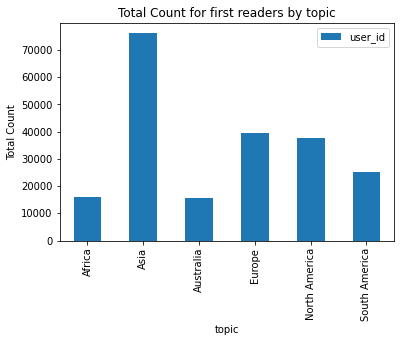

In [ ]:
topic1.plot.bar()
plt.ylabel('Total Count')
plt.title('Total Count for first readers by topic')
plt.show()

Filtering Returning Readers

In [ ]:
readers.loc[(readers.source !='AdWords')&(readers.source !='Reddit')&(readers.source !='SEO')]

,datetime,event_type,country,user_id,source,topic
170,2018-01-01 02:20:18,read,country_5,2.458151e+09,North America,NaN
211,2018-01-01 02:53:39,read,country_4,2.458151e+09,Asia,NaN
278,2018-01-01 03:34:22,read,country_4,2.458152e+09,Africa,NaN
281,2018-01-01 03:36:18,read,country_5,2.458151e+09,Asia,NaN
286,2018-01-01 03:40:42,read,country_5,2.458151e+09,South America,NaN
...,...,...,...,...,...,...
597897,2018-03-31 04:34:32,read,country_4,2.458361e+09,Africa,NaN
597898,2018-03-31 05:02:06,read,country_6,2.458361e+09,Asia,NaN
597899,2018-03-31 05:02:14,read,country_7,2.458361e+09,North America,NaN
597900,2018-03-31 05:03:53,read,country_7,2.458361e+09,Europe,NaN


In [ ]:
returning_readers = readers.loc[(readers.source !='AdWords')&(readers.source !='Reddit')&(readers.source !='SEO')]

In [ ]:
returning_readers.drop(columns = ['topic'])

,datetime,event_type,country,user_id,source
170,2018-01-01 02:20:18,read,country_5,2.458151e+09,North America
211,2018-01-01 02:53:39,read,country_4,2.458151e+09,Asia
278,2018-01-01 03:34:22,read,country_4,2.458152e+09,Africa
281,2018-01-01 03:36:18,read,country_5,2.458151e+09,Asia
286,2018-01-01 03:40:42,read,country_5,2.458151e+09,South America
...,...,...,...,...,...
597897,2018-03-31 04:34:32,read,country_4,2.458361e+09,Africa
597898,2018-03-31 05:02:06,read,country_6,2.458361e+09,Asia
597899,2018-03-31 05:02:14,read,country_7,2.458361e+09,North America
597900,2018-03-31 05:03:53,read,country_7,2.458361e+09,Europe


In [ ]:
returning_readers1 = returning_readers.drop(columns = ['topic'])

In [ ]:
returning_readers1.rename(columns = {'source':'topic'})

,datetime,event_type,country,user_id,topic
170,2018-01-01 02:20:18,read,country_5,2.458151e+09,North America
211,2018-01-01 02:53:39,read,country_4,2.458151e+09,Asia
278,2018-01-01 03:34:22,read,country_4,2.458152e+09,Africa
281,2018-01-01 03:36:18,read,country_5,2.458151e+09,Asia
286,2018-01-01 03:40:42,read,country_5,2.458151e+09,South America
...,...,...,...,...,...
597897,2018-03-31 04:34:32,read,country_4,2.458361e+09,Africa
597898,2018-03-31 05:02:06,read,country_6,2.458361e+09,Asia
597899,2018-03-31 05:02:14,read,country_7,2.458361e+09,North America
597900,2018-03-31 05:03:53,read,country_7,2.458361e+09,Europe


In [ ]:
returning_readers2 = returning_readers1.rename(columns = {'source':'topic'})

Filtering Returning Readers by Country

In [ ]:
returning_readers2.groupby('country').count()

,datetime,event_type,user_id,topic
country,,,,
country_1,1155,1155,1155,1155
country_2,79401,79401,79401,79401
country_3,6386,6386,6386,6386
country_4,58507,58507,58507,58507
country_5,109383,109383,109383,109383
country_6,32596,32596,32596,32596
country_7,80276,80276,80276,80276
country_8,4150,4150,4150,4150


In [ ]:
returning_readers3 = returning_readers2.groupby('country').count()

In [ ]:
returning_readers3.drop(columns = ['datetime','topic','event_type'])

,user_id
country,
country_1,1155
country_2,79401
country_3,6386
country_4,58507
country_5,109383
country_6,32596
country_7,80276
country_8,4150


In [ ]:
returncountries = returning_readers3.drop(columns = ['datetime','topic','event_type'])

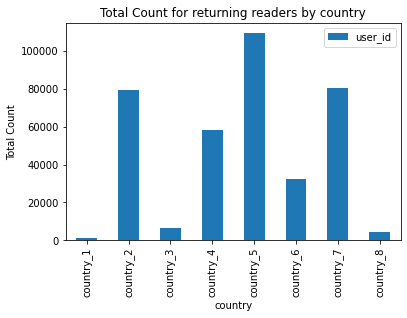

In [ ]:
returncountries.plot.bar()
plt.ylabel('Total Count')
plt.title('Total Count for returning readers by country')
plt.show()

Filtering Returning Readers by Topic

In [ ]:
returning_readers2.groupby('topic').count()

,datetime,event_type,country,user_id
topic,,,,
Africa,27481,27481,27481,27481
Asia,118833,118833,118833,118833
Australia,26931,26931,26931,26931
Europe,54136,54136,54136,54136
North America,92767,92767,92767,92767
South America,51706,51706,51706,51706


In [ ]:
returntopic = returning_readers2.groupby('topic').count()

In [ ]:
returntopic.drop(columns = ['datetime','country','event_type'])

,user_id
topic,
Africa,27481
Asia,118833
Australia,26931
Europe,54136
North America,92767
South America,51706


In [ ]:
returntopic1 = returntopic.drop(columns = ['datetime','country','event_type'])

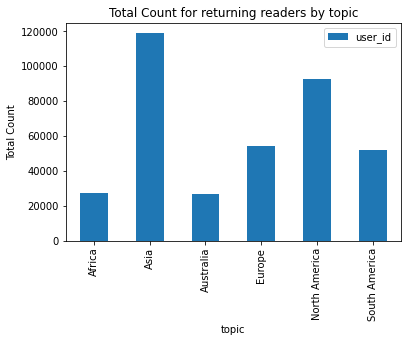

In [ ]:
returntopic1.plot.bar()
plt.ylabel('Total Count')
plt.title('Total Count for returning readers by topic')
plt.show()

In [ ]:
dilans.groupby('event_type').count()

,datetime,country,user_id,source,topic
event_type,,,,,
buy,8407,8407,8407,0,0
read,581877,581877,581877,581877,210023
subscribe,7618,7618,0,0,0


In [ ]:
event_type = dilans.groupby('event_type').count()

In [ ]:
event_type.drop(columns = ['datetime','country','source','topic'])

,user_id
event_type,
buy,8407
read,581877
subscribe,0


In [ ]:
event_type1 = event_type.drop(columns = ['datetime','country','source','topic'])

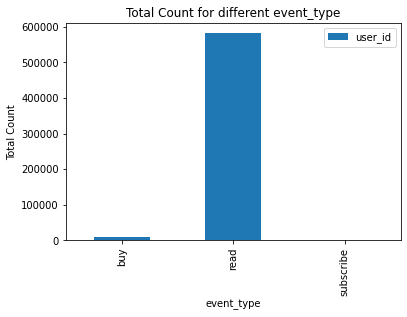

In [ ]:
event_type1.plot.bar()
plt.ylabel('Total Count')
plt.title('Total Count for different event_type')
plt.show()

In [ ]:
dilans[dilans.event_type == 'buy']

,datetime,event_type,country,user_id,source,topic
320,2018-01-01 04:04:59,buy,2458151555,8.0,NaN,NaN
745,2018-01-01 09:28:00,buy,2458151933,8.0,NaN,NaN
1073,2018-01-01 13:23:16,buy,2458152245,8.0,NaN,NaN
1150,2018-01-01 14:20:43,buy,2458152315,8.0,NaN,NaN
1351,2018-01-01 16:56:04,buy,2458152371,8.0,NaN,NaN
...,...,...,...,...,...,...
596620,2018-03-30 20:22:46,buy,2458330984,80.0,NaN,NaN
596981,2018-03-30 21:33:49,buy,2458180092,8.0,NaN,NaN
597391,2018-03-30 22:52:29,buy,2458331539,80.0,NaN,NaN
597517,2018-03-30 23:11:30,buy,2458339835,80.0,NaN,NaN


In [ ]:
buyers = dilans[dilans.event_type == 'buy']

In [ ]:
buyers.drop(columns = ['datetime','country','source','topic'])

,event_type,user_id
320,buy,8.0
745,buy,8.0
1073,buy,8.0
1150,buy,8.0
1351,buy,8.0
...,...,...
596620,buy,80.0
596981,buy,8.0
597391,buy,80.0
597517,buy,80.0


In [ ]:
buyers1 = buyers.drop(columns = ['datetime','country','source','topic'])

In [ ]:
buyers1.rename(columns = {'user_id':'Price'})

,event_type,Price
320,buy,8.0
745,buy,8.0
1073,buy,8.0
1150,buy,8.0
1351,buy,8.0
...,...,...
596620,buy,80.0
596981,buy,8.0
597391,buy,80.0
597517,buy,80.0


In [ ]:
buyers2 = buyers1.rename(columns = {'user_id':'Price'})

In [ ]:
buyers2.groupby('Price').count()

,event_type
Price,
8.0,6640
80.0,1767


In [ ]:
buyers3 = buyers2.groupby('Price').count()

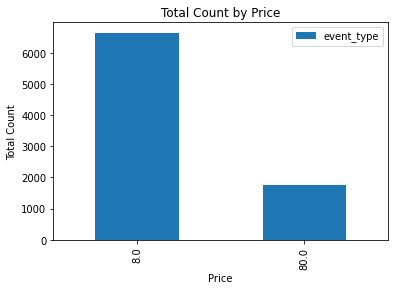

In [ ]:
buyers3.plot.bar()
plt.ylabel('Total Count')
plt.title('Total Count by Price')
plt.show()

In [ ]:
dilans[dilans.event_type == 'subscribe']

,datetime,event_type,country,user_id,source,topic
10,2018-01-01 00:07:41,subscribe,2458151268,NaN,NaN,NaN
11,2018-01-01 00:07:44,subscribe,2458151267,NaN,NaN,NaN
53,2018-01-01 00:40:55,subscribe,2458151309,NaN,NaN,NaN
101,2018-01-01 01:26:26,subscribe,2458151358,NaN,NaN,NaN
105,2018-01-01 01:30:39,subscribe,2458151361,NaN,NaN,NaN
...,...,...,...,...,...,...
597432,2018-03-30 22:58:30,subscribe,2458272661,NaN,NaN,NaN
597477,2018-03-30 23:05:11,subscribe,2458258357,NaN,NaN,NaN
597507,2018-03-30 23:09:25,subscribe,2458338958,NaN,NaN,NaN
597616,2018-03-30 23:27:52,subscribe,2458339595,NaN,NaN,NaN


In [ ]:
subscribers = dilans[dilans.event_type == 'subscribe']

In [ ]:
subscribers.groupby('country').count()

,datetime,event_type,user_id,source,topic
country,,,,,
2458151267,1,1,0,0,0
2458151268,1,1,0,0,0
2458151272,1,1,0,0,0
2458151279,1,1,0,0,0
2458151287,1,1,0,0,0
...,...,...,...,...,...
2458342659,1,1,0,0,0
2458342889,1,1,0,0,0
2458343139,1,1,0,0,0
